Dhruv Kamboj 102303645 3C45

In [36]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

PART-A

In [3]:
#Q1(a)
dataset=load_digits()
print(f"Shape of images: {dataset.images.shape}")
print(f"Shape of data: {dataset.data.shape}")
print(f"Shape of target: {dataset.target.shape}")

Shape of images: (1797, 8, 8)
Shape of data: (1797, 64)
Shape of target: (1797,)


In [4]:
#(b)
flattened_images = dataset.images.reshape(dataset.images.shape[0], -1)

In [5]:
flattened_images[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [6]:
if(flattened_images.shape==dataset.data.shape):
    print("yes, Matches")
else:
    print("Not matching")

yes, Matches


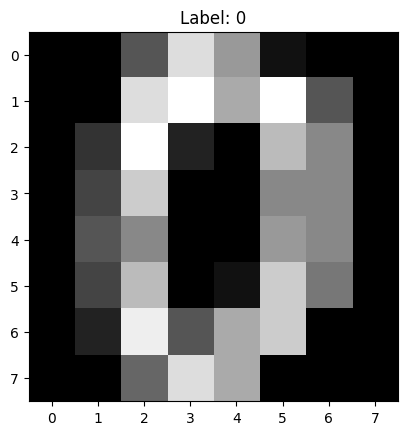

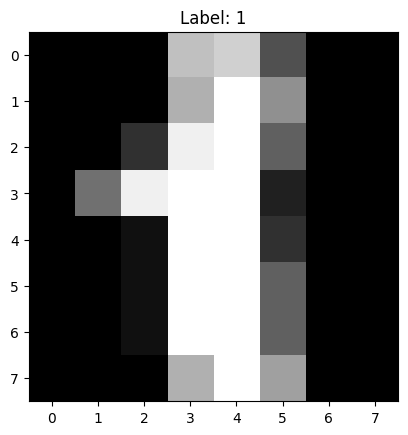

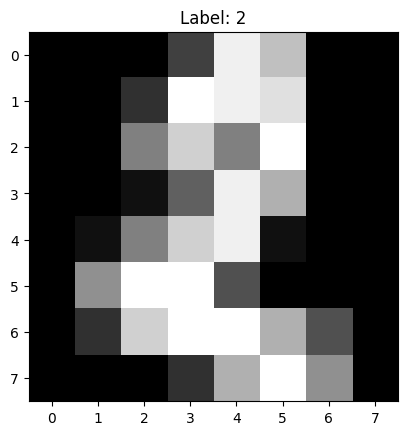

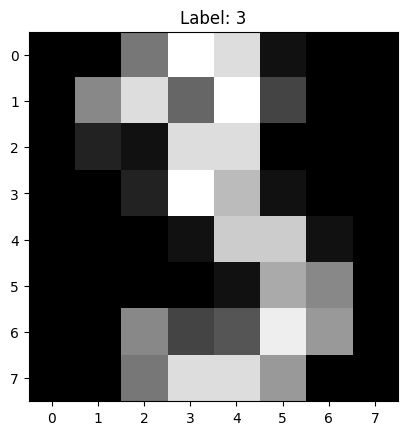

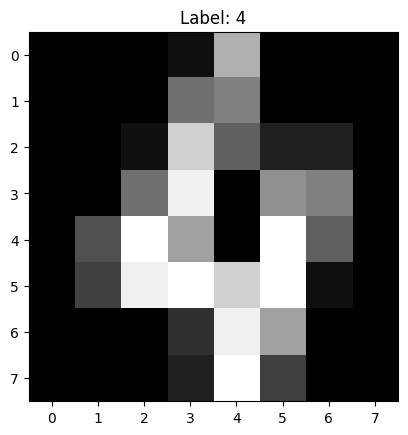

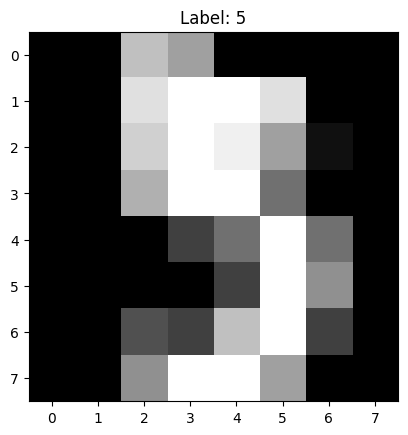

In [7]:
#(c)
for i in range(6):
    plt.imshow(dataset.images[i], cmap='gray')
    plt.title(f"Label: {dataset.target[i]}")
    plt.show()

In [8]:
#Q2(a)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(flattened_images,dataset.target,test_size=0.2,stratify=dataset.target,random_state=42)

In [9]:
#(b)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [10]:
#Q3(a)
from sklearn.linear_model import LogisticRegression
l_model=LogisticRegression(multi_class='ovr',max_iter=1000,random_state=42)
l_model.fit(xtrain,ytrain)

c:\Users\dhruv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='ovr', random_state=42)

In [11]:
l_model.score(xtest,ytest)

0.9694444444444444

In [14]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
ypred=l_model.predict(xtest)
print(f'Training Accuracy: {accuracy_score(ytrain,l_model.predict(xtrain))}')
print(f'Testing Accuracy: {accuracy_score(ytest,ypred)}')


Training Accuracy: 0.9951287404314544
Testing Accuracy: 0.9694444444444444


In [22]:
#Q4(a)
test_sample = xtest[0]
prob_vec = l_model.predict_proba(test_sample.reshape(1, -1))
print('Probabilities:', prob_vec)


Probabilities: [[8.05848711e-05 4.70085159e-08 2.38824549e-08 2.84404141e-06
  6.87437796e-05 6.76371769e-01 1.16198999e-04 2.83713970e-07
  2.23539345e-04 3.23135966e-01]]


In [23]:
#(b)
#As we can see the index 5 has the highest probability
#now comparing it with the actual label:
print(f'True label: {ypred[0]}')

True label: 5


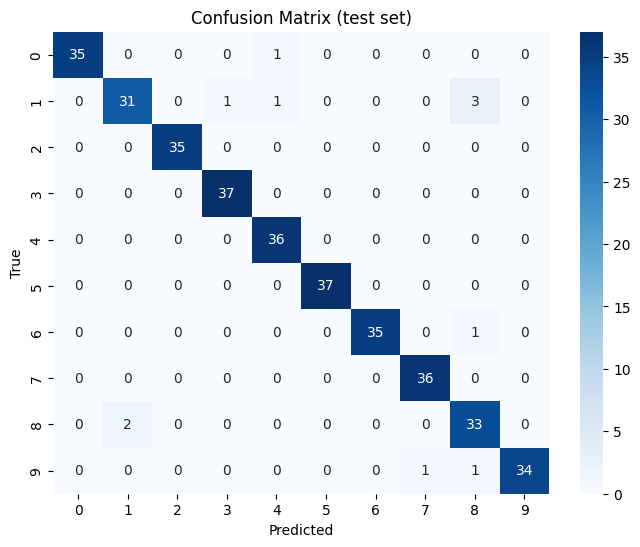

In [24]:
#Q5(a)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# ypred was computed earlier as predictions on xtest
cm = confusion_matrix(ytest, ypred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (test set)')
plt.show()

In [25]:
#(b)
import numpy as np
cm_no_diag = cm.copy()
np.fill_diagonal(cm_no_diag, 0)
flat = cm_no_diag.flatten()
top3_idx = np.argsort(flat)[-3:][::-1]
pairs = []
n_classes = cm.shape[0]
for idx in top3_idx:
    true = idx // n_classes
    pred = idx % n_classes
    pairs.append((true, pred, cm[true, pred]))
print('Top 3 most confused digit pairs (true -> predicted) with counts:')
for t, p, c in pairs:
    print(f'{t} -> {p}: {c}')


Top 3 most confused digit pairs (true -> predicted) with counts:
1 -> 8: 3
8 -> 1: 2
6 -> 8: 1


C=0.01: test accuracy=0.9472
C=0.1: test accuracy=0.9611
C=1: test accuracy=0.9694
C=10: test accuracy=0.9639


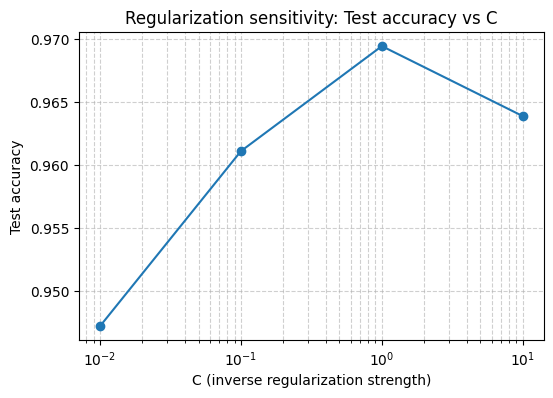

In [38]:
# Q6
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
Cs = [0.01, 0.1, 1, 10]
test_accuracies = []
for C in Cs:
    model = LogisticRegression(C=C, multi_class='ovr', max_iter=1000, random_state=42)
    model.fit(xtrain, ytrain)
    ypred_C = model.predict(xtest)
    acc = accuracy_score(ytest, ypred_C)
    test_accuracies.append(acc)
    print(f'C={C}: test accuracy={acc:.4f}')
    
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.semilogx(Cs, test_accuracies, marker='o')
plt.xlabel('C (inverse regularization strength)')
plt.ylabel('Test accuracy')
plt.title('Regularization sensitivity: Test accuracy vs C')
plt.grid(True, which='both', ls='--', alpha=0.6)
plt.show()
# Generally, smaller C means stronger regularization. Watch for underfitting at very small C and overfitting at very large C.
# Interpret the plotted curve: if accuracy increases with C, reducing regularization helped; if it decreases, the model may start to overfit.

In [ ]:
# Q7(a)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# (a) Default: C=1, L2 regularization
model_default = LogisticRegression(C=1, penalty='l2', multi_class='ovr', max_iter=1000, random_state=42)
model_default.fit(xtrain, ytrain)
acc_default = accuracy_score(ytest, model_default.predict(xtest))

# (b) Very large C (weak regularization)
model_largeC = LogisticRegression(C=1e6, penalty='l2', multi_class='ovr', max_iter=1000, random_state=42)
model_largeC.fit(xtrain, ytrain)
acc_largeC = accuracy_score(ytest, model_largeC.predict(xtest))

# (c) No regularization: penalty=None 
model_no_reg = LogisticRegression(penalty=None, solver='lbfgs', multi_class='ovr', max_iter=1000, random_state=42)
model_no_reg.fit(xtrain, ytrain)
acc_no_reg = accuracy_score(ytest, model_no_reg.predict(xtest))

In [41]:
#(b)
print('Summary of test accuracies:')
print('Default (C=1, L2):', acc_default)
print('Very large C=1e6:', acc_largeC)
print('No regularization (penalty=None):', acc_no_reg)

Summary of test accuracies:
Default (C=1, L2): 0.9694444444444444
Very large C=1e6: 0.9416666666666667
No regularization (penalty=None): 0.9416666666666667


PART-B

In [51]:
#(a)
W=l_model.coef_
b=l_model.intercept_
sample_idx = 0
x_sample = xtest[sample_idx]
zs = W.dot(x_sample) + b
print(zs)

[ -9.05068748 -16.49754214 -17.17472687 -12.3948855   -9.20962939
   4.15154099  -8.68464233 -14.69990399  -8.03020284  -0.11875643]


In [55]:
#(b)
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
pks = sigmoid(zs)
print(pks)

[1.17296601e-04 6.84239989e-08 3.47624901e-08 4.13969007e-06
 1.00061110e-04 9.84503770e-01 1.69135316e-04 4.12964417e-07
 3.25376277e-04 4.70345735e-01]


In [56]:
#(c)
pks=pks/sum(pks)
print(pks)

[8.05848711e-05 4.70085159e-08 2.38824549e-08 2.84404141e-06
 6.87437796e-05 6.76371769e-01 1.16198999e-04 2.83713970e-07
 2.23539345e-04 3.23135966e-01]


In [63]:
#(d)
print("Manual OvR:")
print(pks)
print("-"*50)
print("Sklearn’s predict_proba Result:")
print(l_model.predict_proba(xtest)[0])

Manual OvR:
[8.05848711e-05 4.70085159e-08 2.38824549e-08 2.84404141e-06
 6.87437796e-05 6.76371769e-01 1.16198999e-04 2.83713970e-07
 2.23539345e-04 3.23135966e-01]
--------------------------------------------------
Sklearn’s predict_proba Result:
[8.05848711e-05 4.70085159e-08 2.38824549e-08 2.84404141e-06
 6.87437796e-05 6.76371769e-01 1.16198999e-04 2.83713970e-07
 2.23539345e-04 3.23135966e-01]
